# import library package

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
pd.set_option("display.max_rows", 1000) 
pd.set_option("display.max_columns", 1000)

# Load the dataset

* <b>X</b> - x-axis spatial coordinate within the Montesinho park map: 1 to 9
* <b>Y</b> - y-axis spatial coordinate within the Montesinho park map: 2 to 9
* <b>month</b> - month of the year: 'jan' to 'dec'
* <b>day</b> - day of the week: 'mon' to 'sun'
* <b>FFMC</b> - FFMC index from the FWI system: 18.7 to 96.20
* <b>DMC</b> - DMC index from the FWI system: 1.1 to 291.3
* <b>DC</b> - DC index from the FWI system: 7.9 to 860.6
* <b>ISI</b> - ISI index from the FWI system: 0.0 to 56.10
* <b>temp</b> - temperature in Celsius degrees: 2.2 to 33.30
* <b>RH</b>- relative humidity in %: 15.0 to 100
* <b>wind</b> - wind speed in km/h: 0.40 to 9.40
* <b>rain</b> - outside rain in mm/m2 : 0.0 to 6.4
* <b>fire</b> - the burned area of the forest (in ha): 0.00 to 1090.84
(this output variable is very skewed towards 0.0, thus it may make
sense to model with the logarithm transform).

In [2]:
fires = pd.read_csv("forestfires.csv")    #reading the dataset
fires.head(15)    #show the first 15 instances of dataset

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [3]:
#show the last 10 instances of dataset
fires.tail(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
507,2,4,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
508,1,2,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,0.00
509,5,4,aug,fri,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,2.17
510,6,5,aug,fri,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,0.43
511,8,6,aug,sun,81.6,56.7,665.6,1.9,27.8,35,2.7,0.0,0.00
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00
516,6,3,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,0.00


In [4]:
fires.shape

(517, 13)

# preprocessing

In [5]:
#changing days into numeric quantity because machine learning model deals with numbers
fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#changing month into numeric quantity
fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

#showing first 10 instances of dataset after converting days and months into numbers
fires.head(15) 

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,fire
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,8,7,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,8,1,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,8,1,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,9,2,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,9,6,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


In [6]:
#Check for missing values
print('Number of missing values across columns: \n',fires.isnull().sum())

Number of missing values across columns: 
 X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
fire     0
dtype: int64


In [7]:
#generate descriptive statistics of each attribute
fires.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
month,517.0,7.475822,2.275990,1.0,7.0,8.00,9.00,12.00
day,517.0,4.259188,2.072929,1.0,2.0,5.00,6.00,7.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00


In [8]:
#given area of land burnt, but we have to predict if there is fire or not so changing values of area to 0 and 1 only
#here 0 represet there is not fire and 1 represent fire, changing all values of area which are greater than 0 to 1
fires['fire'].values[fires['fire'].values > 0] = 1

#renaming the fire attribute to output for clear understanding
fires = fires.rename(columns={'fire': 'output'})
fires.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [9]:
#Compute pairwise correlation of columns
fires.corr()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,output
X,1.000000,0.539548,-0.065003,-0.024922,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.062491
Y,0.539548,1.000000,-0.066292,-0.005453,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.056892
month,-0.065003,-0.066292,1.000000,-0.050837,0.291477,0.466645,0.868698,0.186597,0.368842,-0.095280,-0.086368,0.013438,0.130329
day,-0.024922,-0.005453,-0.050837,1.000000,-0.041068,0.062870,0.000105,0.032909,0.052190,0.092151,0.032478,-0.048340,-0.042970
FFMC,-0.021039,-0.046308,0.291477,-0.041068,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.073823
DMC,-0.048384,0.007782,0.466645,0.062870,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.062672
DC,-0.085916,-0.101178,0.868698,0.000105,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.096724
ISI,0.006210,-0.024488,0.186597,0.032909,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.035663
temp,-0.051258,-0.024103,0.368842,0.052190,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.076047
RH,0.085223,0.062221,-0.095280,0.092151,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.035587


In [10]:
#sorting to see which attribute is correlated more to attribute "output" 
fires.corr()['output'].sort_values()

day      -0.042970
RH       -0.035587
rain      0.025550
ISI       0.035663
wind      0.055702
Y         0.056892
X         0.062491
DMC       0.062672
FFMC      0.073823
temp      0.076047
DC        0.096724
month     0.130329
output    1.000000
Name: output, dtype: float64

#### we can see that attribute "month" is the mostly correlated  to attribute "output"

# Feature engineering

In [11]:
from sklearn.preprocessing import StandardScaler
#standardization of data
#removing the mean and scaling it to unit variance
#score=(x-mean)/std
scaler = StandardScaler()
#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(fires.drop('output',axis=1))

scaled_features = scaler.transform(fires.drop('output',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=fires.columns[:-1])
df_feat.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,1.008313,0.569860,-1.968443,0.357721,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268
1,1.008313,-0.244001,1.110120,-1.090909,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268
2,1.008313,-0.244001,1.110120,0.840597,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268
3,1.440925,1.383722,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155
4,1.440925,1.383722,-1.968443,1.323474,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268


# Spliting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X = df_feat
y = fires['output']
# splitting the data into training and testing in 7:3 (70% training and 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=200)

In [13]:
X_train.shape

(361, 12)

# CNN

In [14]:
#importing the required libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

In [15]:
# Creating the model
model3 = Sequential()

# input layer
model3.add(Dense(400, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model3.add(Dropout(0.5))

# first hidden layer
model3.add(Dense(300,kernel_initializer= 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# second hidden layer
model3.add(Dense( 300, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# third hidden layer
model3.add(Dense(300,kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# fourth hidden layer
model3.add(Dense(200, kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# fifth hidden layer
model3.add(Dense(100,kernel_initializer = 'uniform', activation = 'relu'))
model3.add(Dropout(0.5))

# output layer
model3.add(Dense(1,kernel_initializer= 'uniform',  activation = 'sigmoid'))


In [16]:
# summarizing
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               5200      
                                                                 
 dropout (Dropout)           (None, 400)               0         
                                                                 
 dense_1 (Dense)             (None, 300)               120300    
                                                                 
 dropout_1 (Dropout)         (None, 300)               0         
                                                                 
 dense_2 (Dense)             (None, 300)               90300     
                                                                 
 dropout_2 (Dropout)         (None, 300)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               9

In [17]:
X_train.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
500,1.440925,1.383722,0.230531,-1.090909,0.989220,1.097573,0.497365,1.158784,0.467304,1.270532,0.492982,2.632426
311,0.575701,-1.057862,0.670325,1.323474,0.318294,-0.079275,0.848014,0.192826,1.018932,-0.999173,-1.238940,-0.073268
69,-0.289524,0.569860,-1.968443,0.357721,0.191362,-1.212361,-1.898266,-0.004756,-0.291185,-1.121860,0.269509,-0.073268
392,-1.587360,-1.057862,0.670325,1.323474,0.064430,2.585433,1.118364,-0.421874,0.519019,-0.079023,-0.009834,-0.073268
477,-0.289524,-1.057862,-0.209264,1.323474,0.554025,-0.149604,-0.502530,1.246598,1.243031,0.043664,-0.009834,-0.073268


In [18]:
# compiling the model
hist=model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#model.fit(xtrain,ytrain,epochs=10,Validation_data=(xtest,ytest))
hist=model3.fit(X_train, y_train, validation_data=(X_test,y_test), batch_size=10, epochs=10)

Epoch 1/10
37/37 [==============================] - 1s 8ms/step - loss: 0.6934 - accuracy: 0.5291 - val_loss: 0.6934 - val_accuracy: 0.4936
Epoch 2/10
37/37 [==============================] - 0s 5ms/step - loss: 0.6909 - accuracy: 0.5346 - val_loss: 0.6950 - val_accuracy: 0.4936
Epoch 3/10
37/37 [==============================] - 0s 4ms/step - loss: 0.6925 - accuracy: 0.5346 - val_loss: 0.6903 - val_accuracy: 0.4936
Epoch 4/10
37/37 [==============================] - 0s 4ms/step - loss: 0.6800 - accuracy: 0.5319 - val_loss: 0.7019 - val_accuracy: 0.4936
Epoch 5/10
37/37 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.5291 - val_loss: 0.6874 - val_accuracy: 0.4936
Epoch 6/10
37/37 [==============================] - 0s 4ms/step - loss: 0.6833 - accuracy: 0.5512 - val_loss: 0.6909 - val_accuracy: 0.5641
Epoch 7/10
37/37 [==============================] - 0s 5ms/step - loss: 0.6746 - accuracy: 0.5734 - val_loss: 0.6865 - val_accuracy: 0.5962
Epoch 8/10
37/37 [==

## Evaluating the Model

In [19]:
res = model3.predict(X_test)

In [20]:
# R2 Score
from sklearn.metrics import r2_score
print(r2_score(y_test, res))

0.00474612829108112


In [21]:
# RMSE
print(np.sqrt(metrics.mean_squared_error(y_test, res)))

0.49877106127458926


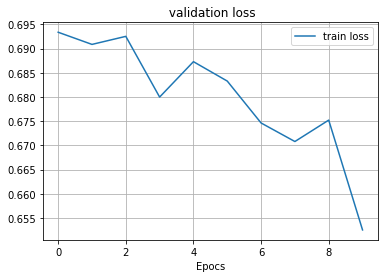

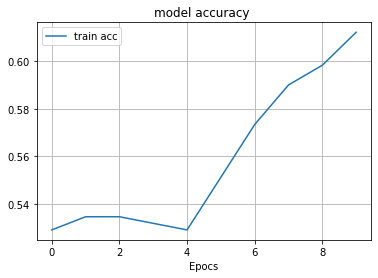

<Figure size 432x288 with 0 Axes>

In [22]:
# plot the loss
plt.plot(hist.history['loss'], label='train loss')

plt.legend()
plt.xlabel("Epocs")
plt.title(" validation loss")
plt.grid()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(hist.history['accuracy'], label='train acc')

plt.legend()
plt.xlabel("Epocs")
plt.title("model accuracy ")
plt.grid()
plt.show()
plt.savefig('AccVal_acc')

# Output

In [23]:
test=model3.predict(np.array([[1,4,8,6,90.2,96.9,624.2,8.9,20.3,39,4.9,0.0]]))
print(test)
if test[0]==1:
    print("wildfire detected")
else:
    print("wildfire not Detected")

[[1.]]
wildfire detected
